In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### First, let's import the dataset from the github upload

In [2]:
#Read the CSV in from the raw github file using pd.read_csv() and take a glance using .head()
data = pd.read_csv('https://raw.githubusercontent.com/ConorPAnderson/adult_census_income/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
#Let's get some information about the dataset first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Let's look at every unique value in each column
#Using a for loop, print the name of the column and then the unique values in each column
for col in data:
    print(col)
    print(data[col].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-

In [5]:
#Based on the unique values in each column (done below), let's see how many rows have ? in values
data[(data['workclass'] == '?') | (data['occupation'] == '?') | (data['native.country'] == '?')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [6]:
#Let's change those values to null values first
data[data == '?'] = np.nan
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
#And let's check to make sure there aren't any ? in our values
data[(data['workclass'] == '?') | (data['occupation'] == '?') | (data['native.country'] == '?')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [8]:
#Now let's change those NaN values to whatver the mode (most commonly occuring value) in each column is
for column in ['workclass','occupation','native.country']:
    #We use fillna and .mode() which returns an object that can be indexed to grab the value itself
    data[column].fillna(data[column].mode()[0], inplace=True)

In [9]:
#And let's finally check for any null values
data.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

### Now, let's do some exploratory analysis.

In [10]:
#Age Range
#Sort the dataframe by age for an easier visual, then subset by age, taking unique values and making sure no errors
data.sort_values('age')['age'].unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

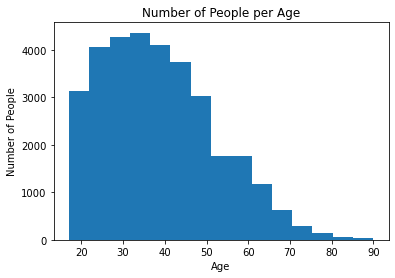

In [11]:
#Age distribution
#Create a histogram using plt.hist and our age column, using 15 bins
plt.hist(data['age'], bins = 15)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People per Age')
plt.show()

In [12]:
#Age Statistics
#Using .describe() to show our mean, median and stdev most importantly
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [13]:
#Check for null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
#Let's look at every unique value in each column
#Using a for loop, print the name of the column and then the unique values in each column
for col in data:
    print(col)
    print(data[col].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Ar

### After looking at the data, we see we have a large number of categorical variables, including the variable we want to predict, income > or < 50k. We will need to engineer that feature in order to do numerical and categorical analysis, however we can engineer the other features later when we want to apply a model to them... for now, here is a list of features we can change.

### Feature engineering to do list (prior to exporatory analysis)
 - Adjust for "?" in workclass, occupation, and native.country (give them the mode value)
 - Map 0 and 1 to our predictor column, <=50k or >=50k
 - Map 0 and 1 to the sex column (Male vs Female)
 - Map 0 and 1 to marital status (define whether the category is married vs not-married, then apply that)
 - Map 0 and 1 to race (white vs non-white)
 - Map 0 and 1 to native.country (US-born vs non-US-born)
 - Map 0 and 1 to workclass (define first, working vs non-working)
 - Map 0 and 1 to occupation (define first, blue collar vs white collar

In [15]:
#Replace the categorical variables with numerical variables
data['income'] = data['income'].replace({'<=50K':0, '>50K' :1})

In [16]:
#Check to make sure it worked by calling value_counts()
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

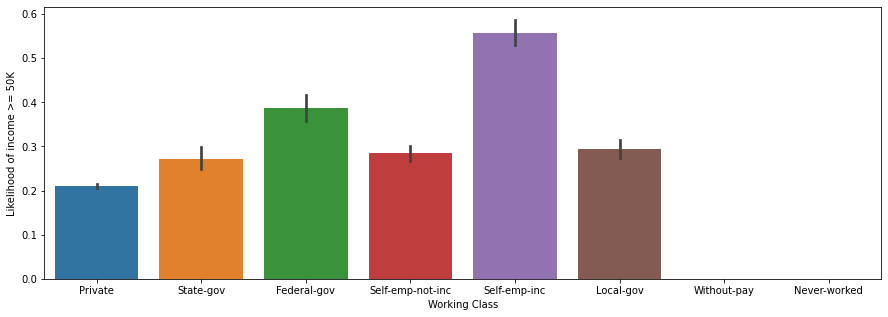

In [17]:
#Let's visualize how each categorical variable relates to income, starting with ['workclass']
plt.figure(figsize = (15,5))
sns.barplot(x = data['workclass'], y = data['income'])
plt.xlabel('Working Class')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Those who are self-employed (incorporated) and work for the federal government are most likely to have incomes greater than 50k/year
### - Private and state employees are least likely
### - No easy grouping here

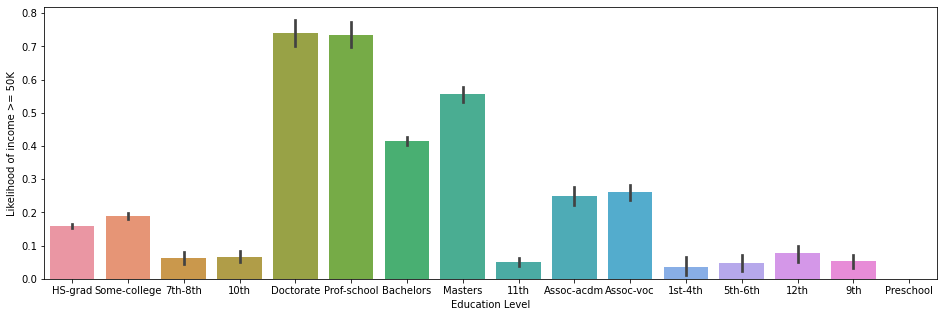

In [18]:
plt.figure(figsize = (16,5))
sns.barplot(x = data['education'], y = data['income'])
plt.xlabel('Education Level')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Just over 3/4ths of all those with a Doctorate or PhD earn >50K 
### - All who did not complete high school have less than 10% likelihood of earning >50K
### - Group by college grad (1) vs non-college grad (0)

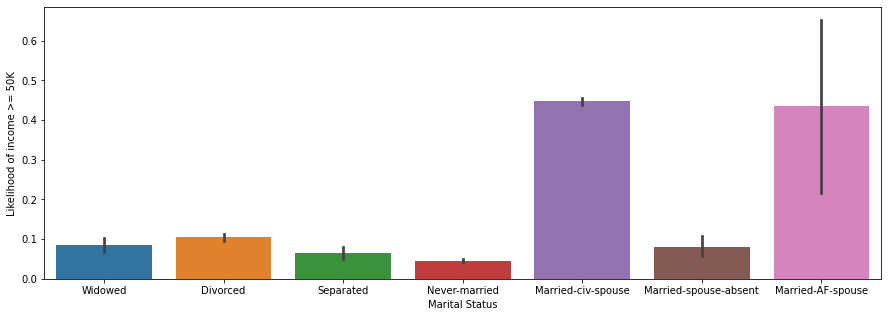

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['marital.status'], y = data['income'])
plt.xlabel('Marital Status')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Those with Civillian spouses and Armed Forces spouses are 3-5x more likely to be >50K than the other Marital Statuses
### -  Group by Married, spouse in life (1) vs non-married, no partner (0)

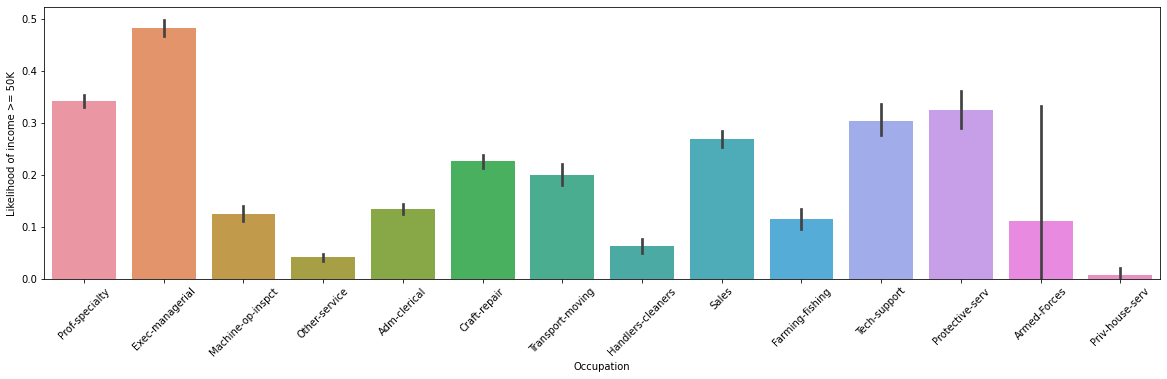

In [20]:
plt.figure(figsize = (20,5))
sns.barplot(x = data['occupation'], y = data['income'])
plt.xlabel('Occupation')
plt.ylabel('Likelihood of income >= 50K')
plt.xticks(rotation = 45)
plt.show()

### - Executive/Managerial and Professor/Specialty occupations are the most likely to earn >50K
### - Sales, Tech support, and Protective Service are the only others to have a >25% chance to earn more than 50K
### - White collar = Exec-managerial, Prof-specialty, Tech-support, Sales

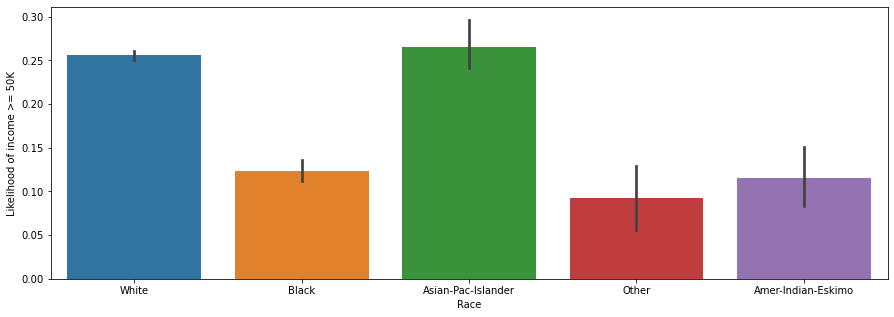

In [21]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['race'], y = data['income'])
plt.xlabel('Race')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Asian/Pacific Islanders are the most likely to earn >50K
### - All non white/asian races have less than 13% probability to earn >50K/year
### - Original idea was White = 1, Non-white = 0, but may switch to White/Asian = 1

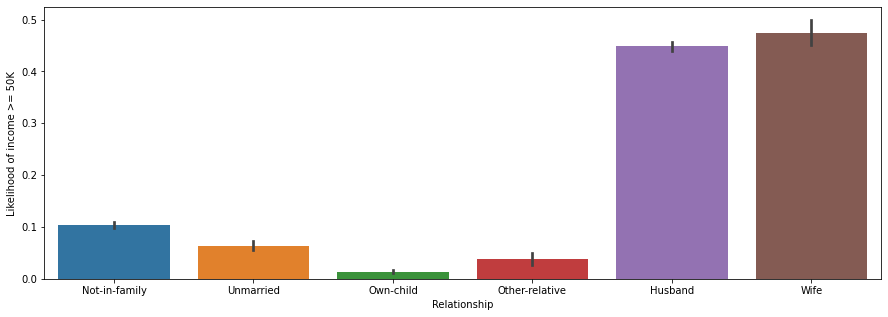

In [22]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['relationship'], y = data['income'])
plt.xlabel('Relationship')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Men with wives are the most likely to earn >50K/year
### - Women with Husbands are slightly less likely to earn 50K/year than their counterparts
### - Those unmarried, without family, living with relatives or single parents are all less than 10% likely to make >50K
### - Split into Husband/Wife = 1, Non-marriage relationship = 0

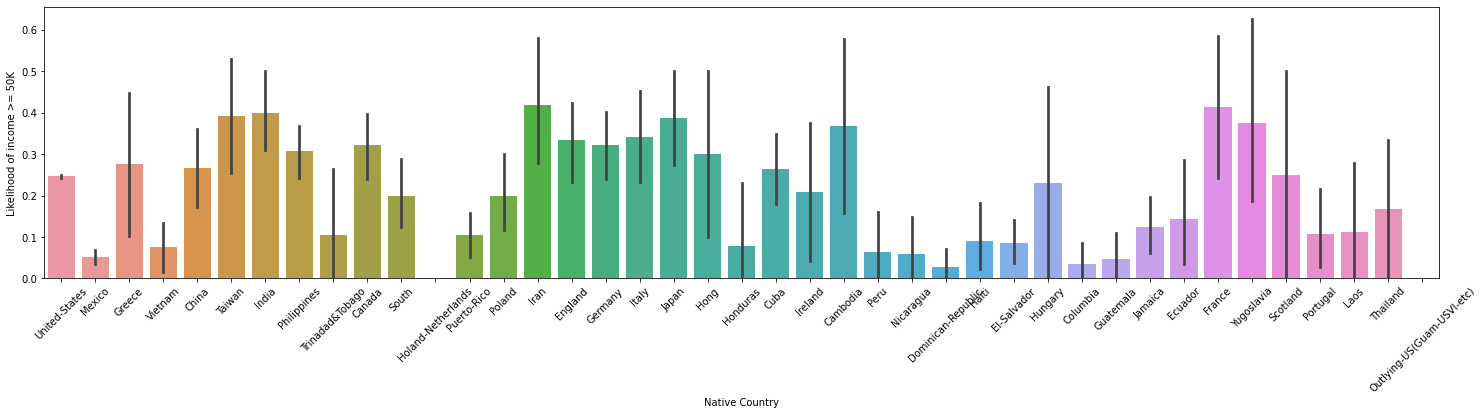

In [23]:
plt.figure(figsize = (25,5))
sns.barplot(x = data['native.country'], y = data['income'])
plt.xlabel('Native Country')
plt.ylabel('Likelihood of income >= 50K')
plt.xticks(rotation = 45)
plt.show()

### - While many countries have a higher likelihood of a >50K income than the United States, the black bars are confidence intervals so the the larger the bar the greater the range of outcomes
### - Can do US 1, other country 0 but it may not have much statistical significance. Only inkling is the error bars

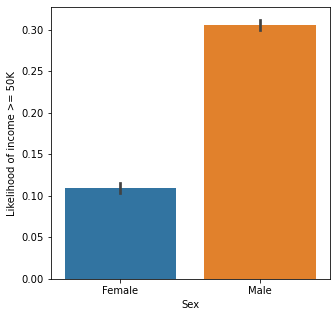

In [24]:
plt.figure(figsize = (5,5))
sns.barplot(x = data['sex'], y = data['income'])
plt.xlabel('Sex')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Males are more than twice as likely to make >50K/year in our dataset
### - Men get 1, women get 0

In [25]:
for col in data:
    print(col)
    print(data[col].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Ar

## Feature engineering list after exploratory analysis
### Reassign these categorical variables...

- relationship
        - 'Husband' or 'Wife' = 1
        - 'Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' = 0
- race
        - 'White' or 'Asian-Pac-Islander' = 1
        - 'Black' or 'Other' or 'Amer-Indian-Eskimo' = 0
        - OR one-hot encoding for this column because there are only 5 unique values
- sex
        - 'Male' = 1
        - 'Female' = 0
        - OR one-hot encoding for this column because there are only 2 unique values
- occupation
        - White collar = 'Exec-managerial', 'Prof-specialty','Adm-clerical', 'Sales', 'Tech-support' = 1
        - Blue collar = 'Machine-op-inspct' 'Other-service' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners' 'Farming-fishing' 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'
- native.country
        - drop the column
- workclass
        - drop the column
- marital.status
        - drop column, redundant to relationship
- education
        - drop column, already order integer factorized in education.num column

In [26]:
#Use .replace to set 0s and 1s
data['relationship'] = data['relationship'].replace(['Husband','Wife'], 1).replace(['Not-in-family','Unmarried','Own-child','Other-relative'], 0)
data['race'] = data['race'].replace(['White','Asian-Pac-Islander'], 1).replace(['Black','Other','Amer-Indian-Eskimo'], 0)
data['sex'] = data['sex'].replace('Male', 1).replace('Female', 0)
data['occupation'] = data['occupation'].replace(['Exec-managerial', 'Prof-specialty','Adm-clerical', 'Sales', 'Tech-support'], 1).replace(['Machine-op-inspct', 'Other-service', 'Craft-repair', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], 0)
data.drop(labels = ['native.country','workclass','marital.status','education'], axis = 1, inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   occupation      32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   race            32561 non-null  int64
 6   sex             32561 non-null  int64
 7   capital.gain    32561 non-null  int64
 8   capital.loss    32561 non-null  int64
 9   hours.per.week  32561 non-null  int64
 10  income          32561 non-null  int64
dtypes: int64(11)
memory usage: 2.7 MB


# Now let's look at numerical variables

In [28]:
#Let's grab the numerical values
data.dtypes

age               int64
fnlwgt            int64
education.num     int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
income            int64
dtype: object

In [29]:
#Let's create a new dataframe with just our numerical variables
numericals = data[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']]
numericals.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0


In [30]:
#.corr() creates a correlation matrix
numericals.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

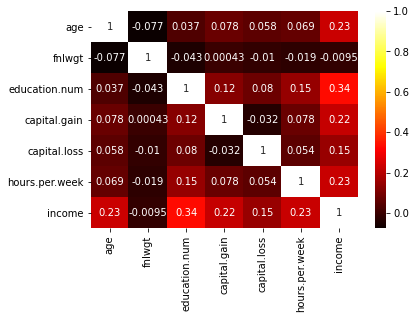

In [31]:
#Let's plot the correlation matrix on a heat map
sns.heatmap(numericals.corr(), annot = True, cmap = 'hot')

### - Education, hours per week, age and capital gain correlate most strongly

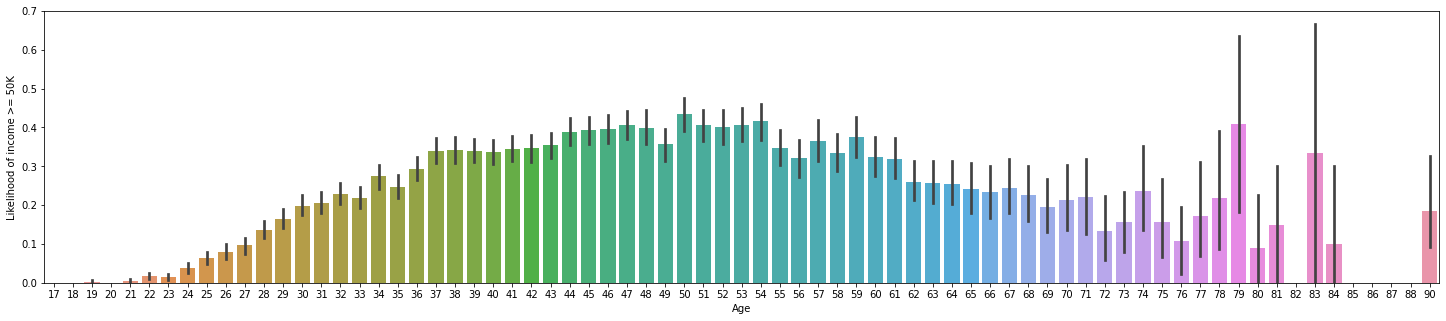

In [32]:
#Now let's visualize them individually
plt.figure(figsize = (25,5))
sns.barplot(x = data['age'], y = data['income'])
plt.xlabel('Age')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Our data almost follows a normal distribution, with some outliers at the end of age that have largely varying confidence intervals

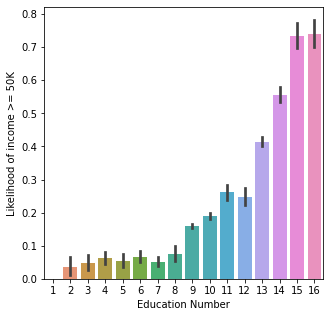

In [33]:
plt.figure(figsize = (5,5))
sns.barplot(data = data, x = data['education.num'], y = data['income'])
plt.xlabel('Education Number')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

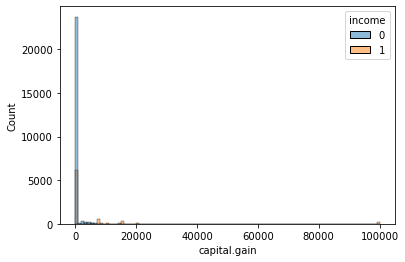

In [34]:
sns.histplot(data=data, x = 'capital.gain', hue = 'income', bins = 100)
plt.show()

In [35]:
data['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [36]:
data[data['capital.gain'] == 99999]

,age,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1519,54,166459,15,1,1,1,1,99999,0,60,1
1520,52,152234,9,1,1,1,1,99999,0,40,1
1521,53,263925,9,1,1,1,1,99999,0,40,1
1522,52,118025,13,1,1,1,1,99999,0,50,1
1523,46,370119,15,1,1,1,1,99999,0,60,1
...,...,...,...,...,...,...,...,...,...,...,...
1673,47,155664,14,1,1,1,1,99999,0,55,1
1674,43,62026,15,1,1,1,1,99999,0,40,1
1675,66,115498,13,1,1,1,1,99999,0,55,1
1676,47,294913,15,1,1,1,1,99999,0,40,1


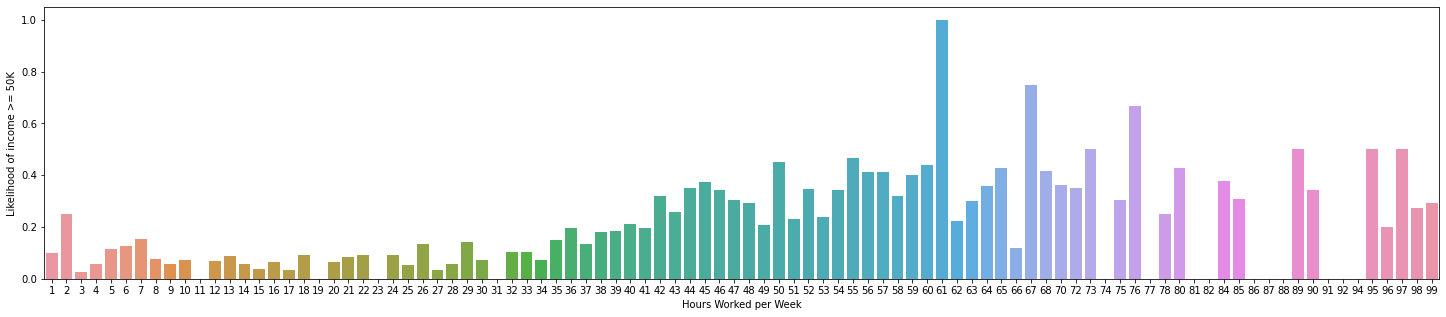

In [37]:
plt.figure(figsize = (25,5))
sns.barplot(data = data, x = data['hours.per.week'], y = data['income'], ci = None)
plt.xlabel('Hours Worked per Week')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

# Now let's apply some models

Naive Bayes
[[5888  305]
 [1357  591]]
Accuracy: 0.7958481758997666
Precision: 0.6595982142857143
Recall: 0.303388090349076


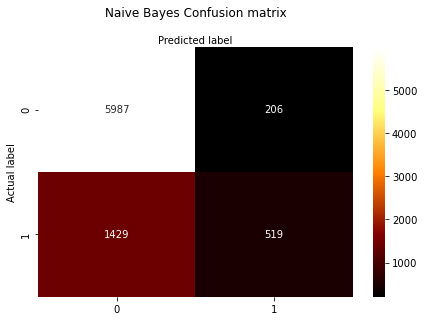

In [82]:
#Set features
X = data[['occupation', 'relationship', 'race', 'sex', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
#Set target Variable
y = data['income']

#Set test/train split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#select the model
nb = GaussianNB()
#fit the model
nb.fit(X_train,y_train)
#predict based on the model
y_pred=nb.predict(X_test)

#Create a confusion matrix displaying our metrics
print('Naive Bayes')
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Display the accurate and inaccurate scores for our confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="afmhot" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Logistic Regression
[[5987  206]
 [1429  519]]
Accuracy: 0.7991647217786513
Precision: 0.7158620689655173
Recall: 0.26642710472279263


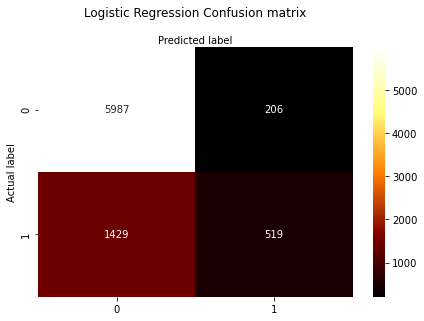

In [83]:
#select a new model
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train,y_train)

#predict based on the model
y_pred=logreg.predict(X_test)

#Create a confusion matrix displaying our metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Logistic Regression')
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Display the accurate and inaccurate scores for our confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="afmhot" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Decision Tree
[[5348  845]
 [ 790 1158]]
Accuracy: 0.7991647217786513
Precision: 0.5781328007988018
Recall: 0.5944558521560575


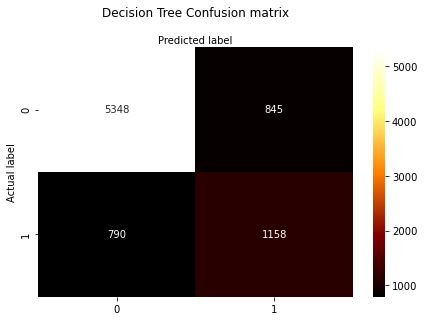

In [84]:
#select another new model
cart = DecisionTreeClassifier()

#fit the model
cart.fit(X_train,y_train)

#predict based on the model
y_pred=cart.predict(X_test)

#Create a confusion matrix displaying our metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Decision Tree')
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Display the accurate and inaccurate scores for our confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="afmhot" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

K-Nearest Neighbors
[[5705  488]
 [1319  629]]
Accuracy: 0.7780370961798305
Precision: 0.5631154879140555
Recall: 0.3228952772073922


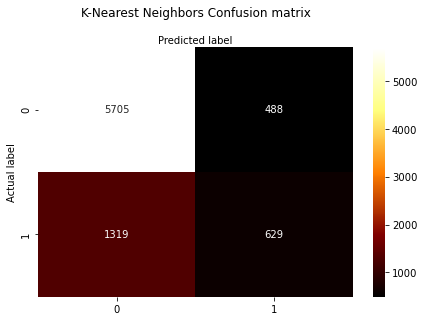

In [85]:
#select a final new model
knn = KNeighborsClassifier()

#fit the model
knn.fit(X_train,y_train)

#predict based on the model
y_pred=knn.predict(X_test)

#Create a confusion matrix displaying our metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('K-Nearest Neighbors')
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Display the accurate and inaccurate scores for our confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="afmhot" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('K-Nearest Neighbors Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()